In [3]:
%pip install scikit-learn

     ---------------------------------------- 11.0/11.0 MB 6.4 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 KB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import cfd_simulate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import three_desc_model as exponential_new
from itertools import combinations
from cutoffs import Polynomial
import GP_functions1 as GP
from GP_functions1 import TurbineUtility
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [2]:
# Constants
min_dist = 279.0
max_xdist = 4000
max_width = 500
numturb = 4
num_samples = 100  # Number of samples for uncertainty quantification
num_simulations = 10  # Number of simulations for each configuration


In [3]:
#Set up neighbourlist calculation
# USE NEW CLASSES
turbine_utility = TurbineUtility()
nl = turbine_utility.nl
nl=exponential_new.NeighborlistCalculator(cutoff=4001,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
symbol="Siemens"
turb = [symbol]

In [10]:
# Generate valid turbine positions
def generate_valid_turbine_positions():
    while True:
        turbines = np.zeros([numturb, 2])
        for i in range(1, numturb):
            turbines[i, 0] = np.random.triangular(0, 0, max_xdist)
            turbines[i, 1] = np.random.triangular(-max_width, 0, max_width)
        neigh = nl.calculate(turb * numturb, turbines)
        for i in range(numturb):
            if len(neigh[i]) == numturb - 1:
                break
        else:
            continue
        for i, j in combinations(range(numturb), 2):
            if np.linalg.norm(turbines[i] - turbines[j]) < min_dist:
                break
        else:
            return turbines

In [11]:
# Generate multiple sets of turbine positions
all_turbine_positions = np.array([generate_valid_turbine_positions() for _ in range(num_samples)])


In [17]:
# ASSUMING SIMULATION CAN GET OUTPUTS?
simulated_energy_outputs = []
for i, turbine_coords in enumerate(all_turbine_positions):
    energy_outputs = []
    for _ in range(num_simulations):
        energy_output = cfd_simulate.simulate(turbine_coords, i)
        energy_outputs.append(energy_output)
    simulated_energy_outputs.append(energy_outputs)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [18]:
# Analyse distribution of simulated E outputs
energy_outputs = np.array(simulated_energy_outputs)
mean_energy_outputs = np.mean(energy_outputs, axis=1)
std_energy_outputs = np.std(energy_outputs, axis=1)






In [19]:
# Find the optimal configuration
optimal_index = np.argmax(mean_energy_outputs - std_energy_outputs)
optimal_positions = all_turbine_positions[optimal_index]
optimal_mean_energy = mean_energy_outputs[optimal_index]
optimal_std_energy = std_energy_outputs[optimal_index]

In [21]:
print(f"Optimal Mean Energy Output: {optimal_mean_energy:.2f}")
print(f"Optimal Standard Deviation of Energy Output: {optimal_std_energy:.2f}")
print(f"Optimal Turbine Positions: {optimal_positions}")

Optimal Mean Energy Output: 0.00
Optimal Standard Deviation of Energy Output: 0.00
Optimal Turbine Positions: [[   0.            0.        ]
 [ 665.67685817  134.13328687]
 [ 468.81283112  385.76123137]
 [1481.46402915  196.00328269]]


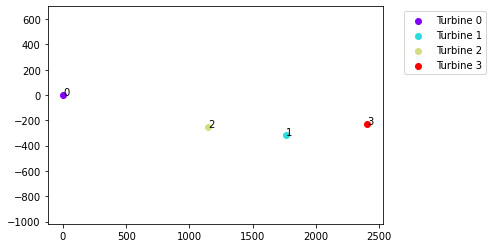

In [5]:
# turbines = np.array(...)
numturb = turbines.shape[0]

# Rainbow colormap with as many colors as turbines
cmap = plt.get_cmap('rainbow', numturb)

# Plot turbines
for i in range(numturb):
    plt.scatter(turbines[i,0], turbines[i,1], color=cmap(i), label='Turbine ' + str(i))

# Set the desired limits for the x and yaxes
plt.xlim(-300, 4500)
plt.ylim(-500, 500)
plt.axis('equal')

# Add labels to each point
for i in range(numturb):
    plt.text(turbines[i, 0], turbines[i, 1], str(i))

# Add legends
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()




In [44]:
turbine_coords = np.array(turbines)
sim_number = 2
cfd_simulate.simulate(turbine_coords, sim_number)

0


0